In [41]:
# coding: utf-8


get_ipython().magic(u'pylab inline')
import sys
from aubio import source, sink, pvoc
import IPython.display as ipd

import os
import pandas as pd
import librosa
import glob 
import matplotlib
import librosa.display

Populating the interactive namespace from numpy and matplotlib


In [42]:
# Read and load input
input_wav = raw_input("Enter input file name: ")
output_wav = raw_input("Enter output file name: ")

Enter input file name: sample.wav
Enter output file name: robot_embedded_output.wav


In [43]:
# Manipulate audio to add robot effect
samplerate = 44100
f = source(input_wav, samplerate, 256)
g = sink(output_wav, samplerate)
total_frames, read = 0, 256

win_s = 512                          # fft size
hop_s = win_s // 2                   # hop size
pv = pvoc(win_s, hop_s)              # phase vocoder

while read:
    samples, read = f()
    spectrum = pv(samples)           # compute spectrum
    #spectrum.norm *= .8             # reduce amplitude a bit
    spectrum.phas[:] = 0.            # zero phase
    new_samples = pv.rdo(spectrum)   # compute modified samples
    g(new_samples, read)             # write to output
    total_frames += read

format_str = "read {:d} samples from {:s}, written to {:s}"
print(format_str.format(total_frames, f.uri, g.uri))
print(output_wav + ' file got created.')

read 366339 samples from sample.wav, written to robot_embedded_output.wav
robot_embedded_output.wav file got created.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: AUBIO WARNING: source_avcodec: upsampling sample.wav from 16000 to 44100
  This is separate from the ipykernel package so we can avoid doing imports until


Input audio:


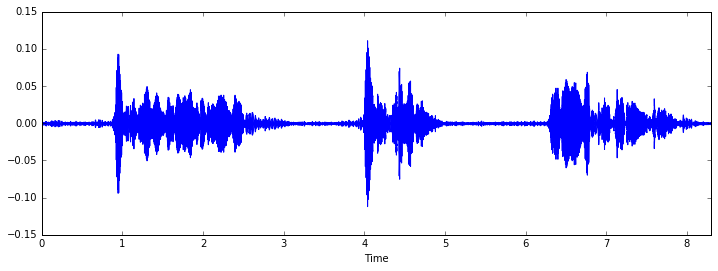

In [44]:
# Run audio file

# When you load the data, it gives you two objects: a numpy array of an audio file and the corresponding 
# sampling rate by which it was extracted. Now to represent this as a waveform

# Load sample human voice for experiment
data, sampling_rate = librosa.load(input_wav)
print('Input audio:')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

ipd.Audio(input_wav)

Output audio:


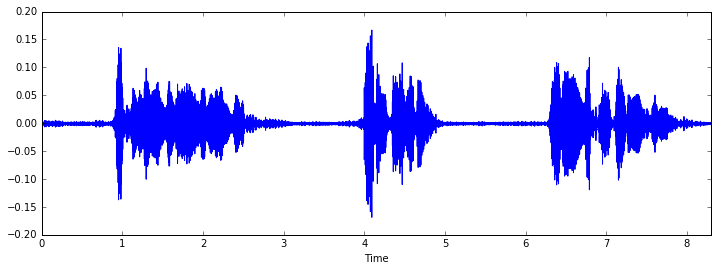

In [45]:
# Output robot voice embedding in human voice
data, sampling_rate = librosa.load(output_wav)
print('Output audio:')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

ipd.Audio(output_wav)